# Lesson 14: Introduction to Graphs

## Overview

__Summary:__ In this lesson we will begin the second half of the course, which will focus on a topic of great importance to computer science: The concept of the __graph__. We have already seen an instance of graphs, namely the use of _directed graphs_ to model relations on sets. Over the next several lessons, we'll expand on this idea and develop both theory and applications of graphs in general. In this lesson we start with getting familiar with graph terminology (of which there is a lot!) and some basic modeling using graphs. 

This lesson addresses the following learning targets: 

+ __GT.1:__ I can give examples of graphs having combinations of various graph properties (directed, undirected, simple graph, multigraph) and instances of graphs of special types (complete, wheel, cycle, cube, bipartite, complete bipartite).
+ __GT.3:__ Given a directed or undirected graph in any representation, I can determine information about the graph as a whole and information about individual nodes and edges using both practical and theoretical methods.


__NOTE: For this lesson, you'll need to download the Jupyter notebook and run it locally, either in a local Sage installation or on SageMath Cloud.__ You _can_ just read it online but you'll be using SageMath below to construct graphs, and this works best if you have the notebook itself in front of you to interact with. 


## Background

Back in Lesson 5 we first learned about _relations_ on a set, and we looked at the fake social network __BookFace__. The users of BookFace, and the people they follow, were given in this table: 

| User | Follows these users:             | 
|:---  | :------------------------------  | 
| Ronald | Scott, Trish                   |
| Scott  | Uriah, Trish                   |
| Trish  | (nobody)                       | 
| Uriah  | Ronald, Scott, Trish, Victoria | 
| Victoria | Uriah, Scott                 | 

We decided at the time that _representing these "connection" relationships visually would be a good idea_. So we first rewrote ths table as a set of tuples: 

    [(Ronald, Scott), (Ronald, Trish), (Scott, Uriah), (Scott, Trish), (Uriah, Ronald), (Uriah, Scott), 
    (Uriah, Trish), (Uriah, Victoria), (Victoria, Uriah), (Victoria, Scott)]
    
...and then we invented the idea of a _directed graph_ to show these relationships in a visual way:

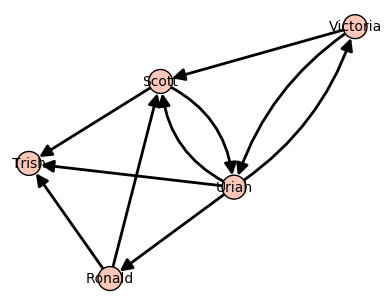

In [3]:
bookface = DiGraph([('Ronald', 'Scott'), ('Ronald', 'Trish'), ('Scott', 'Uriah'), ('Scott', 'Trish'), 
                    ('Uriah', 'Ronald'), ('Uriah', 'Scott'), ('Uriah', 'Trish'), ('Uriah', 'Victoria'), 
                    ('Victoria', 'Uriah'), ('Victoria', 'Scott')])
bookface.show()

Having this visual in front of us helps us see concepts that are not easily visible in tables or lists, and therefore we can ask and answer good questions such as: _What edges would I need to add to this network in order to connect directly all people who are distantly connected?_ (e.g. The idea of transitive closure)

Here's a new example that will motivate the main ideas of this lesson. 

>A mathematics department consists of 12 faculty members which we will just label $1, 2, \dots, 12$. The faculty members divide up into eight committees, $c1, c2, \dots, c8$. Each committee has the following members in it: 

| Committee | Members | 
|:--------- | :------ |
| $c1$     | 1, 2, 3 |
| $c2$     | 1, 4, 5, 8 | 
| $c3$     | 2, 3, 7 | 
| $c4$     | 3, 5, 10 | 
| $c5$     | 4, 10, 11, 12 | 
| $c6$     | 1, 6, 9, 11 | 
| $c7$     | 6, 11, 12 | 
| $c8$     | 2, 9, 11, 12 |

>The faculty have set aside four one-hour blocks during the week for committees to meet. Obviously some committees cannot meet at the same time because they have members who belong to both (for example, $c_1$ and $c_2$ cannot meet at the same time because faculty member 1 belongs to both). 

>__Question:__ Assuming each committee must meet for a full hour once a week, is it possible to schedule the eight committees into the four time slots so that there are no conflicts? If so, what are some possible schedules? 

### The concept of a graph

To answer this question, it helps to visualize the situation. Just as with BookFace, let's visualize as follows: 

+ Create a dot, or a "node", for each committee. 
+ Connect two committees with a line segment, or an "edge", if they _cannot_ meet during the same time. 

Here is what the resulting picture would look like: 

<img src="committees.png">

This looks like the "directed graph" idea that we used in studying relations. We have points or _nodes_ that represent things we wish to connect, and then lines or _edges_ making the connections. However, notice here that the edges don't have direction. This makes sense, because there is no inherent notion of "direction" when thinking about committees being able to meet or not meet at the same time. 

The figure above represents what we will call a __graph__. Here is a formal definition: 

>__Definition:__ A __graph__ $G$ consists of two sets: A finite, nonempty set $V$ of objects called __nodes__ or __vertices__; and a set $E$ of 2-element subsets of $V$ called __edges__. These two sets are called the _vertex set_ and _edge set_ of the graph, respectively. 

For example, in the committee graph above, $V = \{c1, c2, c3, c4, c5, c6, c7, c8\}$. And $E$ is the set 

$$E = \left\{
\{c1, c2\}, \{c1, c3\}, \{c1, c4\}, \{c1, c6\}, \{c1, c8\}, 
\{c2, c4\}, \{c2, c5\}, 
\{c3, c4\}, \{c3, c8\}, 
\{c4, c5\}, 
\{c5, c6\}, \{c5, c7\}, \{c5, c8\},
\{c6, c7\}, \{c6, c8\}, 
\{c7, c8\}
\right\}$$

A note about this definition: You might have been expecting an edge to be defined as an _ordered pair_ of nodes, like we did with directed graphs. For _undirected_ graphs, however, the order in which the nodes appear on an edge is irrelevant, so a two-element set is a more appropriate format since the order of appearance in a set doesn't matter. However, when we get around to discussing how Sage represents graphs, we'll revert back to ordered pairs. More below. 

Back to the committee example, to answer the scheduling question it will help to have a way of thinking about _how connected_ a committee is. For example committees $c2$ and $c3$ only have three conflicts each, while $c1$ has five, so it will be harder to schedule committee $c5$ than it will be to schedule the other two. Here is some more terminology that will help us think about this: 

>__Definitions:__ Let $G$ be a graph with vertex set $V$ and edge set $E$. 
>1. Two nodes $a,b \in V$ are said to be __adjacent__ if $\{a,b\} \in E$ -- that is, if there is an edge that contains both $a$ and $b$. In this case we say that $a$ and $b$ are __neighbors__. 
>2. If $e$ is an edge that contains the node $a$, then we say that $e$ is __incident__ with $a$. 
>3. The __degree__ of a node $v \in V$ is the number of edges that are incident with $v$. The degree of $v$ is denoted $\deg(v)$. 

For example, in the committee graph, $c1$ and $c6$ are adjacent, as are $c2$ and $c5$; but $c1$ and $c5$ are not adjacent. (What would that mean about scheduling these committees?) And here are the degrees of each of the vertices:

| $v$ | $c1$ | $c2$ | $c3$ | $c4$ | $c5$ | $c6$ | $c7$ | $c8$ | 
|:--- |:--- |:--- |:--- |:--- |:--- |:--- |:--- |:--- |
|$\deg(v)$ | 5 | 3 | 3 | 4 | 5 | 4 | 3 | 5 |

The sequence $5, 3, 3, 4, 5, 4, 3, 5$ of degrees of the nodes of this graph is called the __degree sequence__ of the graph. 

It's possible in some graphs to have undirected loops, that is edges of the form $\{a,a\}$. In this case, the loop contributes twice to the degree of the node. For example a node that has a loop and an edge incident with one other node would have degree 3. 


### Related concepts: Directed graphs, weighted graphs, multigraphs, subgraphs

We'll come back to the committee-scheduling problem in a minute, but first here are some related concepts we'll study later. 

#### Directed graphs

What we defined above is sometimes called an _undirected graph_ to distinguish it from the _directed graphs_ we studied earlier. In order to talk about directed graphs in more detail now, we need a formal definition for that idea: 

>__Definition__: A __directed graph__ $G$ consists of two sets: A finite, nonempty set $V$ of objects called __nodes__ or __vertices__; and a set $E$ of ordered pairs of elements of $V$, called __edges__. These two sets are called the _vertex set_ and _edge set_ of the directed graph, respectively. 

Notice the switch to ordered pairs instead of two-element subsets. This gives us a formal notion of "direction", because although $\{a,b\}$ and $\{b,a\}$ is the same set, $(a,b)$ and $(b,a)$ are not the same ordered pair. __Note that the use of the correct delimiter -- parentheses versus set braces -- is essential to the syntax of graphs.__ 

From this point forward, the word "graph" will mean _undirected graph_. We will use "directed graph" explicitly to refer to directed graphs.

Some more terms for directed graphs: 
>__Definitions:__ Suppose $G$ is a directed graph with vertex and edges sets $V$ and $E$. 
>1. If $(a,b)$ is an edge in $G$, then we say __$a$ is adjacent to $b$__ and that __$b$ is adjacent from $a$__. The node $a$ is the __initial node__ of the edge and $b$ is the __terminal node__. 
>2. If $b \in V$, the __in-degree__ of $b$ is the number of edges with $b$ as the terminal node; and the __out-degree__ of $b$ is the number of edges with $b$ as the initial node. We denote these $\deg^-(b)$ and $\deg^+(b)$ respectively. 

A directed loop contributes 1 to both the in-degree and out-degree of the node to/from which it is pointing. 


#### Weighted graphs

In many applications, it makes sense to have some "metadata" attached to an edge in a graph. For example if we used a graph to represent a network of cities with each city represented as a node and an edge between cities representing a direct flight between those cities, we might want to label each edge with the travel distance, or perhaps the cost of flying between those cities. If we do this, we get a __weighted graph__.

>__Definition:__ A weighted graph is a graph $G$ for which each edge $e$ has an associated number $w(e)$, called the __weight__ of the edge $e$. The graph together with the set of its edge weights is called a __weighted graph__. 

All the other terminology we develop for graphs fits with weighted graphs. 

#### Multigraphs

In some situations it might make sense to have more than one edge connecting two nodes. For example, in the airline graph discussed just above, between two cities there might be several different direct flights which we ought to think of as being distinct. If a graph has multiple edges between the same two nodes, this is called a __multigraph__. We won't work much with multigraphs in our course. 

#### Subgraphs

Finally, sometimes we want to think about a graph that is "included in" a "larger" graph. For example in the committee graph, faculty member 7 might wish to think about only those committees to which she belongs. This gives us the idea of a _subgraph_: 

>__Definitions:__ A graph $H$ is a __subgraph__ of another graph $G$ if the vertex set of $H$ is a subset of the vertex set of $G$, and the edge set of $H$ is a subset of the edge set of $G$. We write $H \subseteq G$ and also say that $G$ __contains__ $H$. If a subgraph of $G$ has the exact same vertex set as $G$, then we say it is a __spanning subgraph__ of $G$. 

For example, here is a subgraph of the committee graph: 

<img src="committeessub.png">

And notice this is a spanning subgraph, because the vertex set is the same as the original -- we are just missing some edges. 

### Walks, trails, paths, and circuits

One important concept in graph theory is whether, and how, we can get from one node to another by traversing a sequence of edges. For this, we need one more barrage of terminology. 

>__Definition:__ Suppose $G$ is a graph with vertex and edge sets $V$ and $E$ respectively. If $a,b \in V$, an __$a$-$b$ walk__ is a sequence of nodes in $G$, beginning with $a$ and ending with $b$ such that consecutive vertices are adjacent. 

For example, here again is the committee graph:

<img src="committees.png" height=300 width=300>

+ A $c1$-$c8$ walk would be $(c1, c6, c7, c8)$. 
+ Another $c1$-$c8$ walk would be $(c1, c2, c5, c6, c1, c2, c5, c8)$. 
+ Yet another would be $(c1, c6, c7, c5, c6, c8)$. 
+ Yet another would be just $(c1, c8)$. 
+ However here is a sequence that is _not_ a $c1$-$c8$ walk: $(c1, c3, c8)$. This is because $c3$ isn't adjacent to $c8$. 

A walk that begins and ends at the same node is said to be a __closed walk__. Otherwise it's called an __open walk__. 

Finally here is a definition we will need later: 

>__Definition:__ The __length__ of a walk is the number of edges encountered during the walk, including multiple occurrences of the same edge. 

For example: 

+ The $c1$-$c8$ walk $(c1, c6, c7, c8)$ has length 3. 
+ $(c1, c2, c5, c6, c1, c2, c5, c8)$ has length 7. 
+ $(c1, c8)$ has length 1. 

Obviously some of those walks are more direct than others. To clarify what we mean by one walk being "simpler" or "more direct", note that there are two different ways that a walk can fail to "not be simple": 

+ The walk $(c1, c2, c5, c6, c1, c2, c5, c8)$ repeat edges, namely $\{c1, c2\}$ and $\{c2, c5\}$. 
+ The walk $(c1, c6, c7, c5, c6, c8)$ does _not_ repeat any edges but _does_ repeat nodes (namely $c6$). 

This gives us two more definitions: 

>__Definitions:__ Let $G$ be a graph and let $a,b$ be nodes in $G$. 
>1. An __$a$-$b$ trail__ is an $a$-$b$ walk in which no edge is traversed more than once. 
>2. An __$a$-$b$ path__ is an $a$-$b$ walk in which no vertices are repeated. 

Note that $\text{paths} \subseteq \text{trails} \subseteq \text{walks}$. Every path is a trail because if no nodes are repeated, then no edges are repeated either. But not vice versa. For example $(c1, c2, c5, c6, c1, c2, c5, c8)$ is a walk that is neither a trail nor a path; $(c1, c6, c7, c5, c6, c8)$ is a trail but not a path; and $(c1, c6, c7, c8)$ is a path. 

We have a special situation if a trail has the same starting and ending point:

>__Definitions:__ Let $G$ be a graph. 
>1. A __circuit__ in $G$ is a closed trail of length 3 or more. 
>2. A __cycle__ in $G$ is a circuit with no repeated nodes. 

For example, in the committee graph, $(c1, c2, c5, c6, c8, c5, c6, c1)$ is a circuit because it's closed (starts and ends at the same node), a trail (no edges are repeated), and has length greater than 3 (namely, length 7). However this is not a _cycle_ because of the repeated nodes. On the other hand $(c1, c2, c5, c6, c1)$ is a cycle (of length 4). Note that every cycle is a circuit but not vice versa. 

### Back to the committees 

So, is it possible to schedule the eight committees in four separate one-hour blocks without conflicts? The way we might answer this is to use the graph. If two nodes are adjacent, it means the committees represented by those nodes cannot meet at the same time because they share members. Therefore If two nodes are _not_ adjacent then the committees represented by those nodes _can_ meet at the same time. I'll leave it to you to use this concept to answer the question about scheduling. 

### Summary: A vocabulary list 

There were a lot of new terms in this lesson. Mastering the content that is coming up on graph theory requires that you be very fluent with the language we use for graphs. So it's highly recommended that you spend time memorizing definitions and constructing examples of these terms. Some of this will be dealt with in your Preview Activities, and again in the class discussion of Daily Homework. But otherwise this will mostly be left up to you. For reference, here is a list of all the new terms we introduced here. You should consider making flash cards to memorize these. 

+ Graph
+ Node
+ Edge
+ Vertex set
+ Edge set
+ Adjacent
+ Neighbors
+ Incident
+ Degree
+ Degree sequence
+ Directed graph
+ Adjacent "to" and "from" (in a directed graph)
+ In-degree and out-degree
+ Weighted graph
+ Multigraph
+ Subgraph
+ Spanning subgraph
+ Walk
+ Open walk and closed walk
+ Length of a walk
+ Trail
+ Path
+ Circuit
+ Cycle

## Preview Activities

Found here on Formative: https://goformative.com/student/#/assignments/JUGA434

## Daily Homework 

(1) Use the committee graph to answer the question about scheduling: Is it possible to schedule the eight committees in four one-hour blocks without conflicts? If so, what are some possible schedules? If not, what is the smallest number of   one-hour meeting blocks that you need? 

(2) Let $A$ be any nonempty set of movie actors. Make a graph using $A$ as the vertex set as follows: If $x$ and $y$ are two actors, then there is an edge incident with $x$ and $y$ if and only if $x$ and $y$ appeared in a movie together. For example if [Harrison Ford](http://www.imdb.com/name/nm0000148/?ref_=tt_cl_t1) and [Carrie Fisher](http://www.imdb.com/name/nm0000402/?ref_=fn_al_nm_1) are two actors, then there is an edge incident with them because they both appeared in the movie _Star Wars_. Likewise there is an edge between Harrison Ford and [Edward James Olmos](http://www.imdb.com/name/nm0000402/?ref_=fn_al_nm_1) because they both appeared in the movie _Blade Runner_. However there is no movie known in which Carrie Fisher and Edward James Olmos appeared together, so no edge is between them. Come up with your own set of 10 movie actors and draw the "Hollywood graph" that is being described here. Two helpful resources are IMDB and the [Oracle of Bacon](https://oracleofbacon.org) (where you can put in any two movie actors and see if there is a movie, or a path of movies, from one actor to the other). 

(3) Suppose we have a set of words in English. We say that a word $w_1$ can be transformed into another word $w_2$ if $w_2$ can be obtained from $w_1$ by either interchanging two letters of $w_1$, or by replacing a letter in $w_1$ with another letter. For example "cat" can be transformed into "hat" or "cot" or "can" (by replacing letters) or into "act" (by swapping the first and second letters) but not into "horse". Consider the set of words: 
>ACT, AIM, ARC, ARM, ART, CAR, CAT, OAR, OAT, RAT, TAR

Create a graph by using each of the words as nodes, and connect two nodes with an edge if one of the words can be transformed into the other. This is known as the _word graph_ on this set of words. What possible applications in computing or everyday life might a word graph have? 

(4) Consider the following two different graphs, each of which has three edges, even though they have a different number of nodes: 

<img src="l13pa1.png" height=150 width=150>
<img src="l13pa2.png" height=150 width=150>

Each node in the first graph has degree 2, so if we were to _add up the degrees of each of the nodes_ we would get $2 + 2 + 2 = 6$. If we added up the degrees of each of the nodes in the second graph, we would get $1 + 1 + 1 + 3 = 6$. Make a note of these numbers. Then, draw two different graphs each of which has four edges (although possibly a different number of nodes); again, add up the degrees of all the nodes in each graph and record the results. Repeat for two graphs with five edges, and then two graphs with six edges. What relationship do you notice between the _number of edges_ in the graph and the _sum of the degrees of the nodes_ in the graph? 


### Acknowledgement

The committee graph example and the word graph problem are adapted from Chartrand, Gary; Zhang, Ping (2012-02-15). _A First Course in Graph Theory (Dover Books on Mathematics)_ (p. 5). Dover Publications. Kindle Edition. 

### Final note about Sage

Sage is _awesome_ at working with graphs. The main reason we are bringing Sage into the course is because of its outstanding support for working with graphs of all kinds. However -- we are going to save official coverage of Sage's graph capabilities until next time, Lesson 15 when we talk about _representations of graphs_. Knowing more about graph representations will make the Sage stuff easier to digest. Also, we want to focus this lesson on basic graph concepts. 

However if you read ahead or searched the web on how to use Sage to work with graphs, nobody would stop you. 